# <center>购买商品预测</center>
===========================================================================================================================================
<p align="right">王鑫轶 大数据2001</p>
<p align="right">任新宇 数学2001</p>

# **一、数据概览**


## 1.1 导入相关库

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import preprocessing
# 画图的库
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # 该库可以忽略警告
warnings.filterwarnings('ignore')

## 1.2 导入数据

### 1.2.1 查看训练集和测试集数据

训练集数据

In [2]:
path='data/'
test_data=pd.read_csv(path+'test.csv') # 读取测试集
train_data=pd.read_csv(path+'train.csv')# 读取训练集
train_data.head()# 查看训练集数据的前五条

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,78020.75094,23,0,15,2,48795.32279,0
2,50873.61880,20,3,14,4,352951.49770,0
3,72298.80402,29,4,17,0,276298.69520,0
4,128999.93560,52,1,6,0,152232.50980,0


|列名|salary|age|elevel|car|zipcode|credit|brand|
|----|------|---|------|---|-------|-----|-----|
|意义|工资|年龄|获得的最高的教育等级|车的种类|邮政编码|信用额度|品牌的电脑|

brand 是我们需要预测的标签

测试集数据

### 1.2.2 观察数据个数

In [3]:
print("the number of train set is: ", train_data.shape)
print("the number of test set is: ", test_data.shape)
display(train_data.describe())#预览数据

the number of train set is:  (9398, 7)
the number of test set is:  (4500, 7)


,salary,age,elevel,car,zipcode,credit,brand
count,9398.000000,9398.000000,9398.000000,9398.000000,9398.000000,9398.00000,9398.000000
mean,84660.175727,49.839434,1.981805,10.508087,4.031390,248854.90282,0.601617
std,37366.506559,17.588066,1.420142,5.769663,2.580733,145150.62815,0.489591
min,20000.000000,20.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,52469.618368,35.000000,1.000000,5.000000,2.000000,120493.18980,0.000000
50%,84569.652585,50.000000,2.000000,11.000000,4.000000,250150.51920,1.000000
75%,116370.518950,65.000000,3.000000,15.000000,6.000000,374437.28950,1.000000
max,150000.000000,80.000000,4.000000,20.000000,8.000000,500000.00000,1.000000


我们可以看到训练集数据总共有9398个，测试集数据有4500个。

训练集比较大，因此可以用训练集做交叉验证，再用测试集进行验证模型是否过拟合或欠拟合。

# **二、探索性分析**

## 2.1目标值与变量之间的关系

### 2.1.1不同教育水平对电脑品牌的选择情况

Text(0.5, 1.0, 'Effects of different levels of education on computer brand choice')

<Figure size 864x288 with 0 Axes>

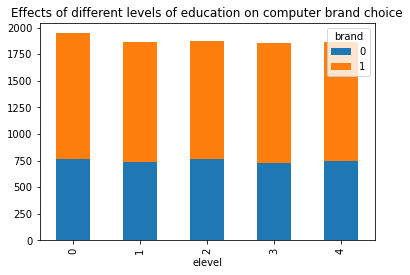

In [4]:
plt.figure(figsize=(12,4))
train_data.pivot_table(index='elevel',columns='brand',values='age',aggfunc='count').plot.bar(stacked=True)
plt.title('Effects of different levels of education on computer brand choice')

从图中可以看出同一学历的人在选择电脑品牌是更倾向于索尼。

不同学历对电脑品牌的选择几乎没有影响。

### 2.1.2不同年龄对电脑品牌选择的影响

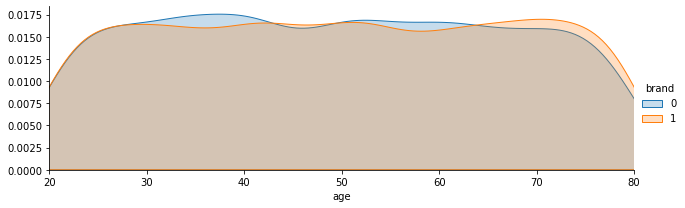

In [5]:
ageFacet=sns.FacetGrid(train_data,hue='brand',aspect=3)#创建坐标轴
ageFacet.map(sns.kdeplot,'age',shade=True)#作图，选择图形的类型
ageFacet.set(xlim=(20,train_data['age'].max()))#其他信息：坐标轴范围、标签等
ageFacet.add_legend()

由图可知在[20,40]和[50,65]这一区间范围内，购买宏碁品牌的人数多于购买索尼品牌的人数,但是在[65,80]内购买索尼品牌的人数更多。

但是总体来看差异不大。

### 2.1.3 薪资对购买电脑品牌的影响

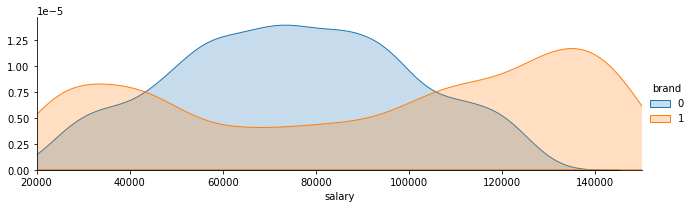

In [6]:
salaryFacet=sns.FacetGrid(train_data,hue='brand',aspect=3)#创建坐标轴
salaryFacet.map(sns.kdeplot,'salary',shade=True)#作图，选择图形的类型
salaryFacet.set(xlim=(20000,train_data['salary'].max()))#其他信息：坐标轴范围、标签等
salaryFacet.add_legend()

由图可以看出薪资与购买宏碁品牌的人数之间近似与正态分布。

薪资处于[40000,100000]的人明显更喜欢购买宏碁品牌，而薪资处于[120000,150000]的人群明显更喜欢购买索尼品牌。

## 2.1.4邮政编码对购买电脑品牌的影响

Text(0.5, 1.0, 'Effects of different zip code on computer brand choice')

<Figure size 864x288 with 0 Axes>

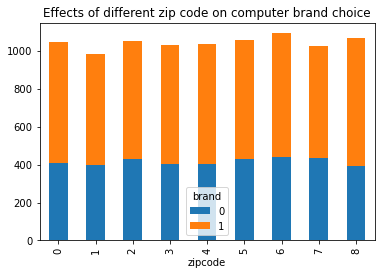

In [7]:
plt.figure(figsize=(12,4))
train_data.pivot_table(index='zipcode',columns='brand',values='age',aggfunc='count').plot.bar(stacked=True)
plt.title('Effects of different zip code on computer brand choice')

由图可以看出处在同一地区的人更倾向于购买索尼品牌，对于不同地区，购买宏碁品牌的人数都大致相同。

### 2.1.5信用额度对购买电脑品牌的影响

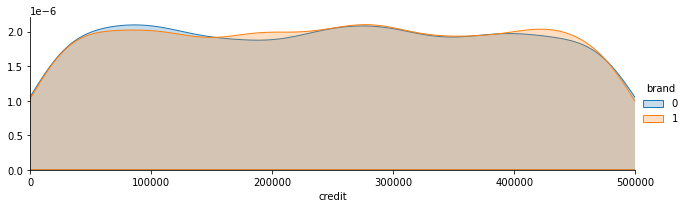

In [8]:
creditFacet=sns.FacetGrid(train_data,hue='brand',aspect=3)#创建坐标轴
creditFacet.map(sns.kdeplot,'credit',shade=True)#作图，选择图形的类型
creditFacet.set(xlim=(0,train_data['credit'].max()))#其他信息：坐标轴范围、标签等
creditFacet.add_legend()

由图可以看出信用额度几乎对两种品牌购买的影响相同

### 2.1.6 不同汽车品牌对购买电脑品牌的影响

Text(0.5, 1.0, 'Effects of different zip code on computer brand choice')

<Figure size 864x288 with 0 Axes>

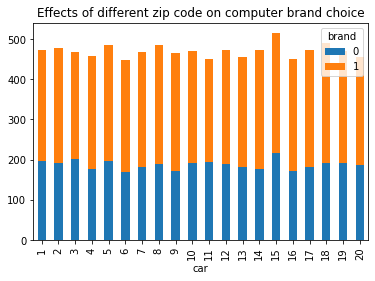

In [9]:
plt.figure(figsize=(12,4))
train_data.pivot_table(index='car',columns='brand',values='age',aggfunc='count').plot.bar(stacked=True)
plt.title('Effects of different zip code on computer brand choice')

由图可以看出同一汽车品牌的人更倾向于购买索尼品牌电脑。不同汽车品牌的人群购买电脑品牌的差异不大

## 2.2多变量分析

<AxesSubplot:>

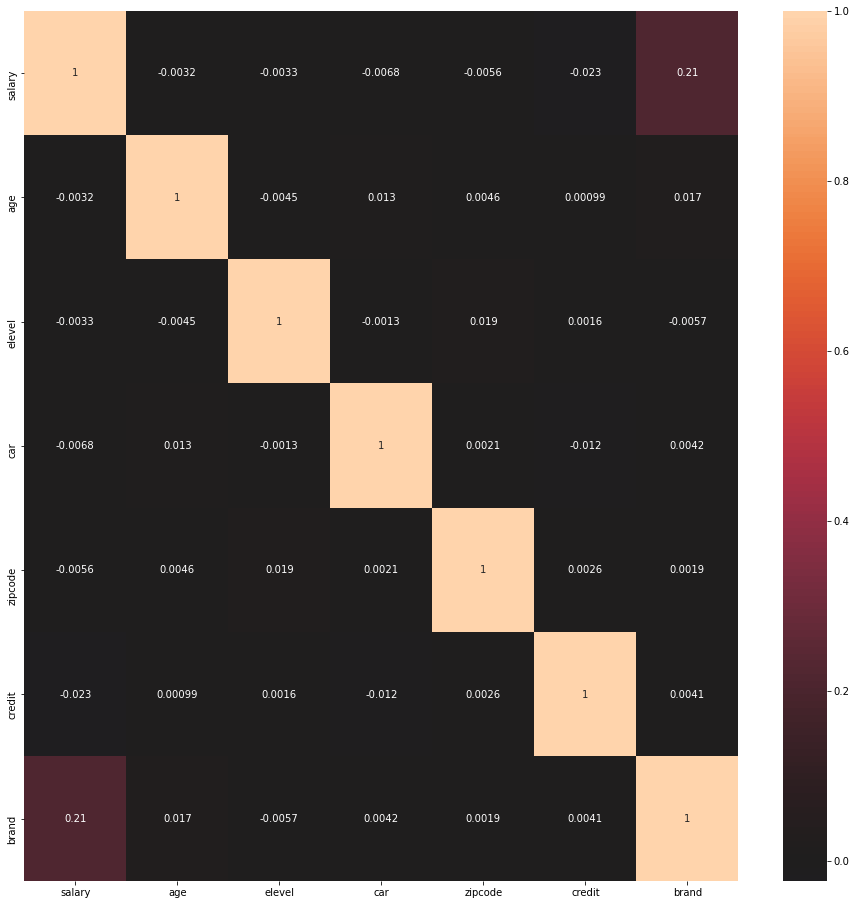

In [10]:
corrs = train_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrs,
             annot=True, # 注入数据
            center = 0)  # 绘制有色数据时将色彩映射居中的值)

可以看出各个特征之间的相关性很低且特征较少。因此不用进行LDA。

# **三、数据预处理**

## 3.1 缺失值处理

先将测试集和训练集放一起，这样进行数据预处理更方便。

In [11]:
all_data=pd.concat([train_data,test_data])# 合并测试机和训练集
all_data = all_data.reset_index() # 重新设置index
all_data.drop('index',axis=1,inplace=True)
train_num=train_data.shape[0] # 存储训练集的列数

查看缺失值

In [12]:
print(all_data.shape) # 查看数据集的数据条数
all_data.info()# 查看各列的个数

(13898, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13898 entries, 0 to 13897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   13898 non-null  float64
 1   age      13898 non-null  int64  
 2   elevel   13898 non-null  int64  
 3   car      13898 non-null  int64  
 4   zipcode  13898 non-null  int64  
 5   credit   13898 non-null  float64
 6   brand    13898 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 760.2 KB


发现该数据集并没有缺失值，因此不需要进行缺失值处理。

## 3.2 One—Hot

使用 one—hot 编码，我们可以将离散特征的取值扩展到欧式空间。

在分类问题中，特征之间距离的计算或相似度计算非常重要，而我们常用的这些计算都在欧式空间中进行相似度计算。

因此这里将数据集的个别离散特征进行 one—hot 编码。

In [13]:
# 定义独热函数
def oneHot_code(all_data,cols):# all_data 为要进行独热的数据集，cols 为该数据集要进行独热的特征名
    all_data = pd.get_dummies(all_data,columns=cols)
    return all_data # 返回独热后的 DataFrame 

In [14]:
all_data=oneHot_code(all_data,['elevel','zipcode','car'])# 将 car、elevel 和 zipcode 特征进行独热。

car、elevel 和 zipcode 特征的特征值虽然为数值，但其代表的含义却是离散的。

因此对该三个特征进行独热操作。

In [15]:
print(all_data.shape)

(13898, 38)


独热之后数据集的维度上升。

## 3.3 特征值组合

将 salary 除以 age 构成一个新的特征，名为 salary_age

In [16]:
all_data['salary_age']=all_data.salary/all_data.age

将 credit 除以 age 构成一个新特征，名为 credit_age

In [17]:
all_data['credit_age']=all_data.credit/all_data.age

将 credit 除以 salary 构成一个新特征，名为 credit_salary

In [18]:
all_data['credit_salary']=all_data.credit/(all_data.salary)

In [19]:
sum(np.isinf(all_data.values))# 查看是否有 inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

因为进行除法之后可能回出现无穷大的情况，所以需要进行检查。检查后发现不存在无穷大。

预览处理后的数据

In [20]:
all_data

,salary,age,credit,brand,elevel_0,elevel_1,elevel_2,elevel_3,elevel_4,zipcode_0,...,car_14,car_15,car_16,car_17,car_18,car_19,car_20,salary_age,credit_age,credit_salary
0,119806.54480,45,442037.71130,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2662.367662,9823.060251,3.689596
1,78020.75094,23,48795.32279,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,3392.206563,2121.535773,0.625415
2,50873.61880,20,352951.49770,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2543.680940,17647.574885,6.937810
3,72298.80402,29,276298.69520,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,2493.062208,9527.541214,3.821622
4,128999.93560,52,152232.50980,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,2480.767992,2927.548265,1.180098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13893,23235.84583,75,375881.49020,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,309.811278,5011.753203,16.176794
13894,92539.75251,80,45027.69697,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1156.746906,562.846212,0.486577
13895,84296.08945,72,131900.46890,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1170.779020,1831.950957,1.564728
13896,129891.40790,32,213871.09990,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,4059.106497,6683.471872,1.646538


In [21]:
def match_case(data,col,num):
    mi=data[col].min()
    ma=data[col].max()
    k=(data[col].max()-data[col].min())/num
    for i in range(data.shape[0]):
        for n in range(num+1):
            if(data[col][i]>= mi+n*k and data[col][i]<=mi+(n+1)*k):
                data[col][i]=n
                break
    return data
        
def match_cases(data,cols,nums):
    for col in cols:
        data=match_case(data=data,col=col,num=nums)
    return data

In [22]:
all_data=match_cases(all_data,['salary','salary_age','credit_age','credit_salary','credit'],5)

In [23]:
all_data

,salary,age,credit,brand,elevel_0,elevel_1,elevel_2,elevel_3,elevel_4,zipcode_0,...,car_14,car_15,car_16,car_17,car_18,car_19,car_20,salary_age,credit_age,credit_salary
0,3.0,45,4.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1.0,1.0,0.0
1,2.0,23,0.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,2.0,0.0,0.0
2,1.0,20,3.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1.0,3.0,1.0
3,2.0,29,2.0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1.0,1.0,0.0
4,4.0,52,1.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13893,0.0,75,3.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.0,1.0,3.0
13894,2.0,80,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
13895,2.0,72,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
13896,4.0,32,2.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2.0,1.0,0.0


## 3.4 归一化处理

&ensp;&ensp;&ensp;&ensp;归一化的具体作用是归纳统一样本的统计分布性。

&ensp;&ensp;&ensp;&ensp;归一化在0-1之间是统计的概率分布，归一化在[-1,1]之间是统计的坐标分布。神经网络是以样本在事件中的统计分别几率来进行训练（概率计算）和预测的，且sigmoid函数的取值是0到1之间的，网络最后一个节点的输出也是如此，所以经常要对样本的输出归一化处理。

&ensp;&ensp;&ensp;&ensp;为了提高模型的精度以及收敛速度，我们对数据进行归一化处理。

定义归一化函数

In [24]:
# # 定义归一化函数
# def minmaxScaler(all_data,cols):
#     from sklearn import preprocessing # 归一化库 
#     min_max_scaler = preprocessing.MinMaxScaler() # 定义类
#     x_minmax = min_max_scaler.fit_transform(all_data[cols]) #拟合
#     x_minmax = pd.DataFrame(x_minmax,columns=cols)
#     all_data.drop(cols,axis=1,inplace=True)
#     all_data=all_data.join(x_minmax)# 合并数据
#     return all_data

对all_data进行归一化处理

In [25]:
# cols=['salary','age','credit','salary_age','credit_age','credit_salary']
# all_data=minmaxScaler(all_data,cols=cols) # 归一化处理

分离训练集和测试集

In [26]:
# 分离训练集和测试集
train = all_data[:train_num]
test = all_data[train_num:]

# 四、训练模型

## 4.1 建立训练模型

分析人们会买什么品牌的电脑，这是一个监督学习的分类问题。

目前监督学习中几种主流的分类算法有：决策树，SVM，贝叶斯，KNN，随机森林，AdaBoost。

下面分别用这几种方法来进行训练模型。

In [27]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
skullsTree=DecisionTreeClassifier()
# SVM
from sklearn import svm
SVM=svm.LinearSVC()
# 贝叶斯
from sklearn import naive_bayes
bys=naive_bayes.GaussianNB()
# KNN
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=50)
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50)

## 4.2 建立交叉验证函数

定义一个交叉验证函数，便于模型评估

In [28]:
# 定义评价函数
def get_scores(models,data,lable):
    from sklearn.model_selection import cross_val_score # 导入交叉验证库
    scores=[]# 保存各个模型的分数
    for model in models:
        score=cross_val_score(model,data,lable,cv=10) # 交叉验证
        scores.append(score)
    return scores

对 skullsTree,SVM,bys,KNN,rfc,ada 模型进行交叉验证，并返回分数

In [29]:
models=[skullsTree,SVM,bys,KNN,rfc,ada]
train_lable=train.brand
train_data=train.drop('brand',axis=1)
test_lable=test.brand
test_data=test.drop('brand',axis=1)
scores=get_scores(models=models,data=train_data,lable=train_lable) #交叉验证并返回分数

输出各个模型交叉验证的分数

In [30]:
# 输出分数
name_list=['skullsTree','SVM','bys','KNN','rfc','ada']
for name,score in zip(name_list,scores):
    print(name+" score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

skullsTree score: 0.8740 (0.0077)
SVM score: 0.5576 (0.0664)
bys score: 0.6402 (0.0230)
KNN score: 0.9004 (0.0106)
rfc score: 0.8997 (0.0111)
ada score: 0.7802 (0.0119)


选择三个分数较高的模型：决策树、随机森林和 AdaBoost

## 4.3测试模型

In [31]:
for model in models:
    model.fit(train_data,train_lable)
    print(model.score(test_data,test_lable))

0.38822222222222225
0.04911111111111111
0.3908888888888889
0.4062222222222222
0.39066666666666666
0.35133333333333333


In [32]:
test

,salary,age,credit,brand,elevel_0,elevel_1,elevel_2,elevel_3,elevel_4,zipcode_0,...,car_14,car_15,car_16,car_17,car_18,car_19,car_20,salary_age,credit_age,credit_salary
9398,0.0,64,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
9399,1.0,51,3.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
9400,4.0,76,0.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1.0,0.0,0.0
9401,2.0,66,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
9402,2.0,34,0.0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13893,0.0,75,3.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.0,1.0,3.0
13894,2.0,80,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
13895,2.0,72,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
13896,4.0,32,2.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2.0,1.0,0.0


# 五、总结

# 参考资料
> []()
> 
> []()
>
> []()
>
> []()